In [2]:
import glob
import re
import os
import sys
import kipoi
import numpy as np
import datetime
import warnings
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

ZEB1 148.52443611548097


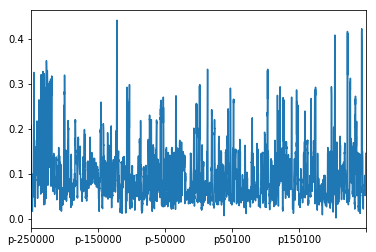

In [3]:
"""#sys.argv=["python_prediction.py","9_37034476",5000,"PAX5",1, 100, 500000]
sys.argv=["python_prediction.py","22_38597889",5000,"MAFF",1, 100, 500000]
sys.argv[4]=int(sys.argv[4])
sys.argv[5]=int(sys.argv[5])
sys.argv[6]=int(sys.argv[6])
#my_data = np.genfromtxt("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", delimiter=',')
#my_data = np.genfromtxt("~/link_epi_to_expr/correlations_done/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", delimiter=',')

#column_names = np.arange(sys.argv[4],sys.argv[6],sys.argv[5])-1-sys.argv[6]/2
#with open('deepsea_postprocessing/predictor.names') as f:
#    row_names = f.read().splitlines()
"""

list_of_genes=sorted(glob.glob("/home/antoine/link_epi_to_expr/correlations_done/correlations_*_*_*.csv"))
corr_parameters = {}
a=511
for i in list_of_genes:
    my_data = pd.read_csv(i, sep=',',header=0,index_col=0)
    i=i.replace('_','/').replace('.','/').split('/')
    sys.argv=["python_prediction.py",str(i[-4])+'_'+str(i[-3]),5000,i[-2],1, 100, 500000]
    corr_parameters[i[-2]] = my_data.abs().max().mean(),my_data.abs().max().std(),stats.anderson(my_data.abs().max())[0]
    print(i[-2], end=' ')
    print(stats.anderson(my_data.abs().max())[0])
    my_data.abs().max().plot()
    plt.show()
    break

ZEB1 ETS1 SPI1 ESRRA ZNF143 SP1 ELF1 YY1 MAX MEF2A TCF12 E2F4 CTCF SREBF1 STAT3 BRCA1 ZBTB7A POU2F2 IRF3 RFX5 USF1 ELK4 ATF3 FOXA2 E2F1 CEBPB GABPA MAFF EP300 SREBF2 BIN1 STAT1 NR2C2 BHLHE40 NFKB1 REST IRF1 EGR1 NR3C1 EBF1 MEF2C TFAP2A PRDM1 TBP IRF4 NFYA SRF NRF1 MAFK MYC HSF1 HEY1 RXRA PAX5 

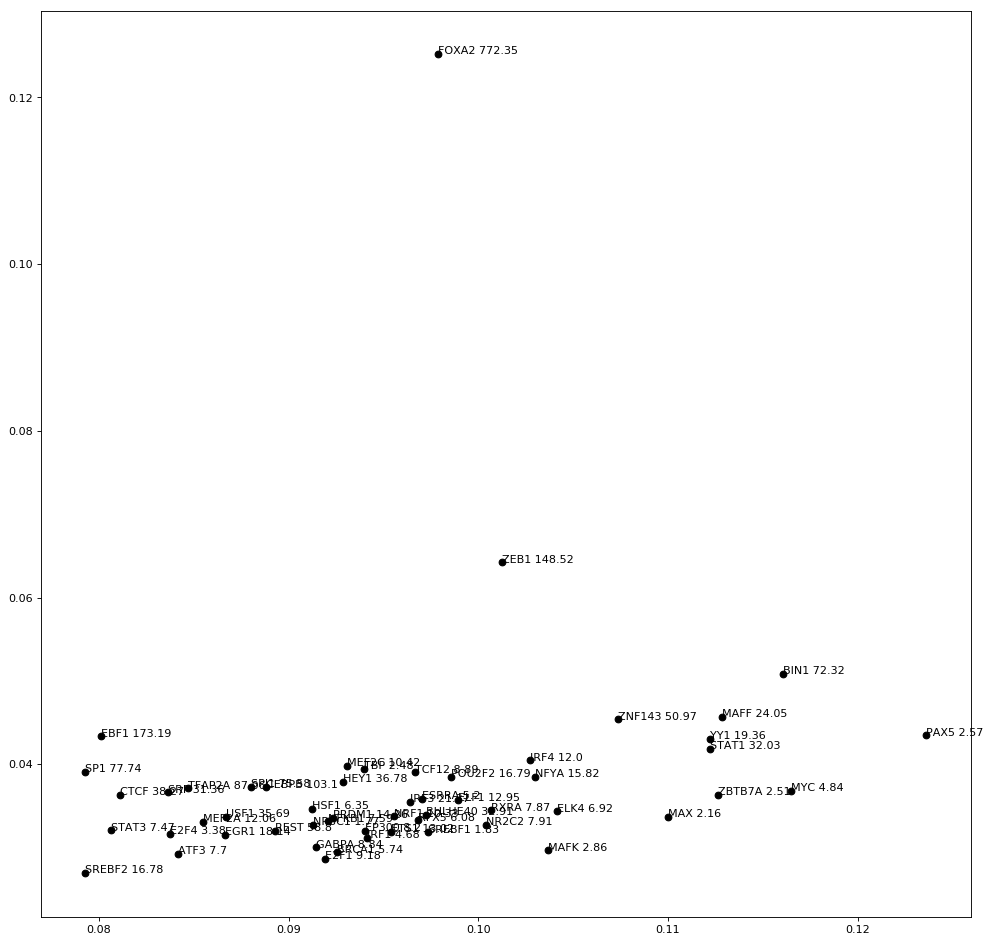

In [5]:
# print(corr_parameters)
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
#for i in list_of_genes[0:2]:
for i in corr_parameters:
#    if corr_parameters[i][2]>40:
        ax.scatter(corr_parameters[i][0], corr_parameters[i][1],c='black')
        ax.annotate(i+" "+str(round(corr_parameters[i][2], 2)),(corr_parameters[i][0], corr_parameters[i][1]))
        print(i, end=' ')

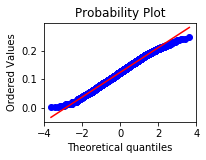

In [4]:
ax1 = plt.subplot(221)
res = stats.probplot(my_data.abs().max(), plot=plt)